# Проект Бусарова Никиты
## Вариант 7 
## Датасет вин, задача классификации м-ом Перцептрона

In [1]:
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

## features

- Alcohol

- Malic acid

- Ash

- Alcalinity of ash

- Magnesium

- Total phenols

- Flavanoids

- Nonflavanoid phenols

- Proanthocyanins

- Color intensity

- Hue

- OD280/OD315 of diluted wines

- Proline

### Выведем распределение всех фичей 

In [2]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

print(X[0:2])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]]


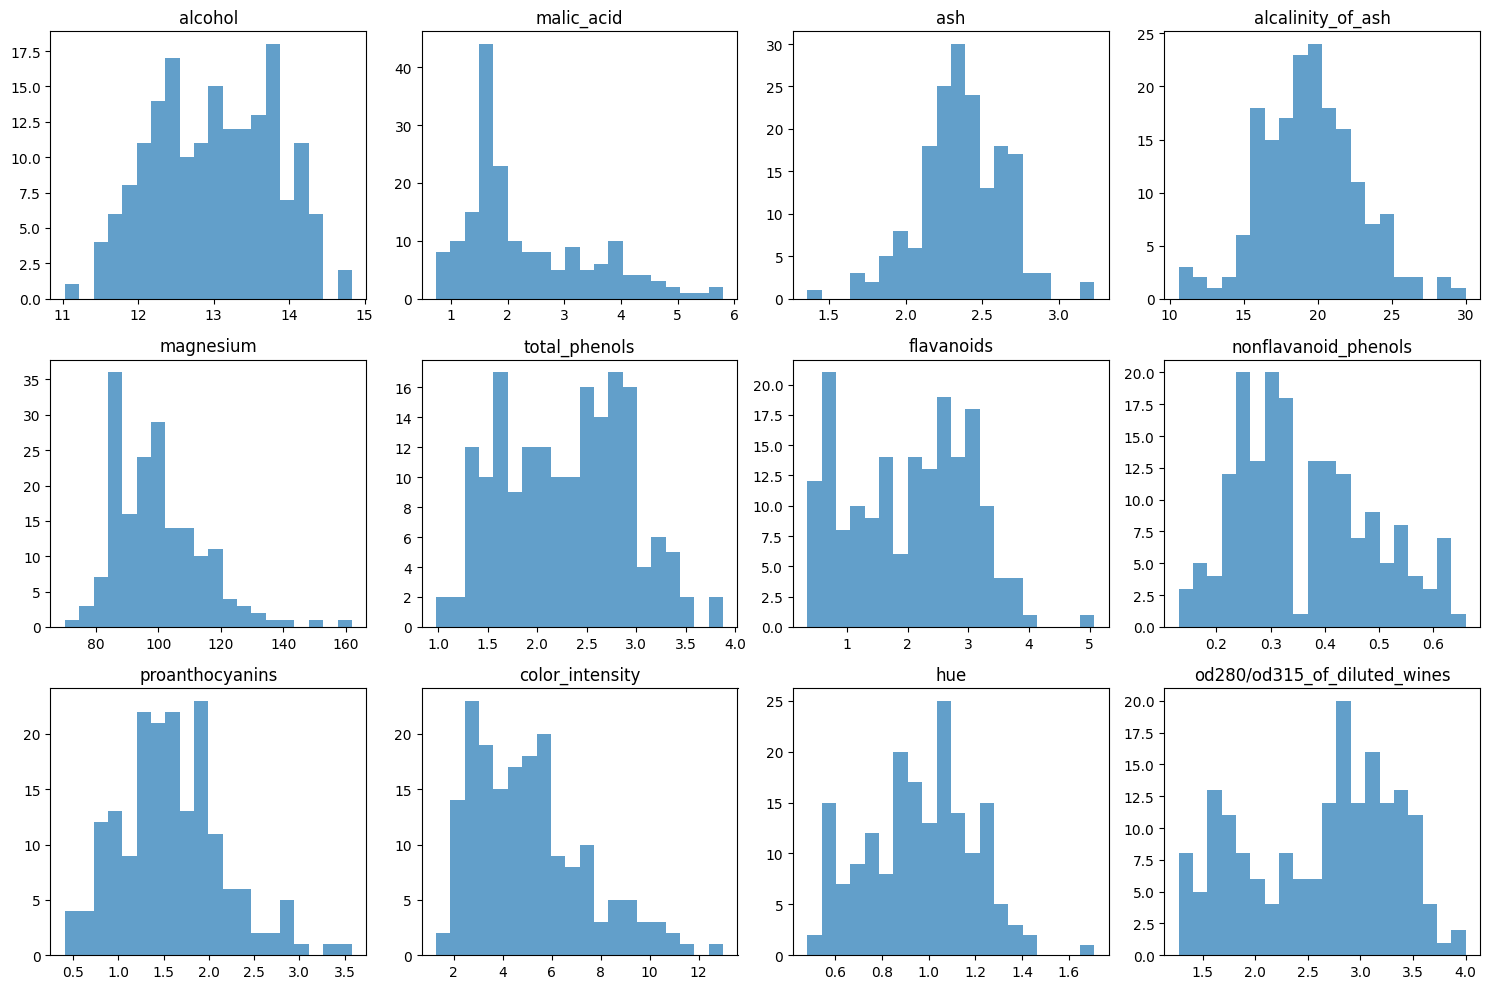

In [3]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(12):
    axs[i].hist(wine_data.data[:,i], bins=20, alpha=0.7)

    axs[i].set_title(wine_data.feature_names[i])
plt.tight_layout()
plt.show()

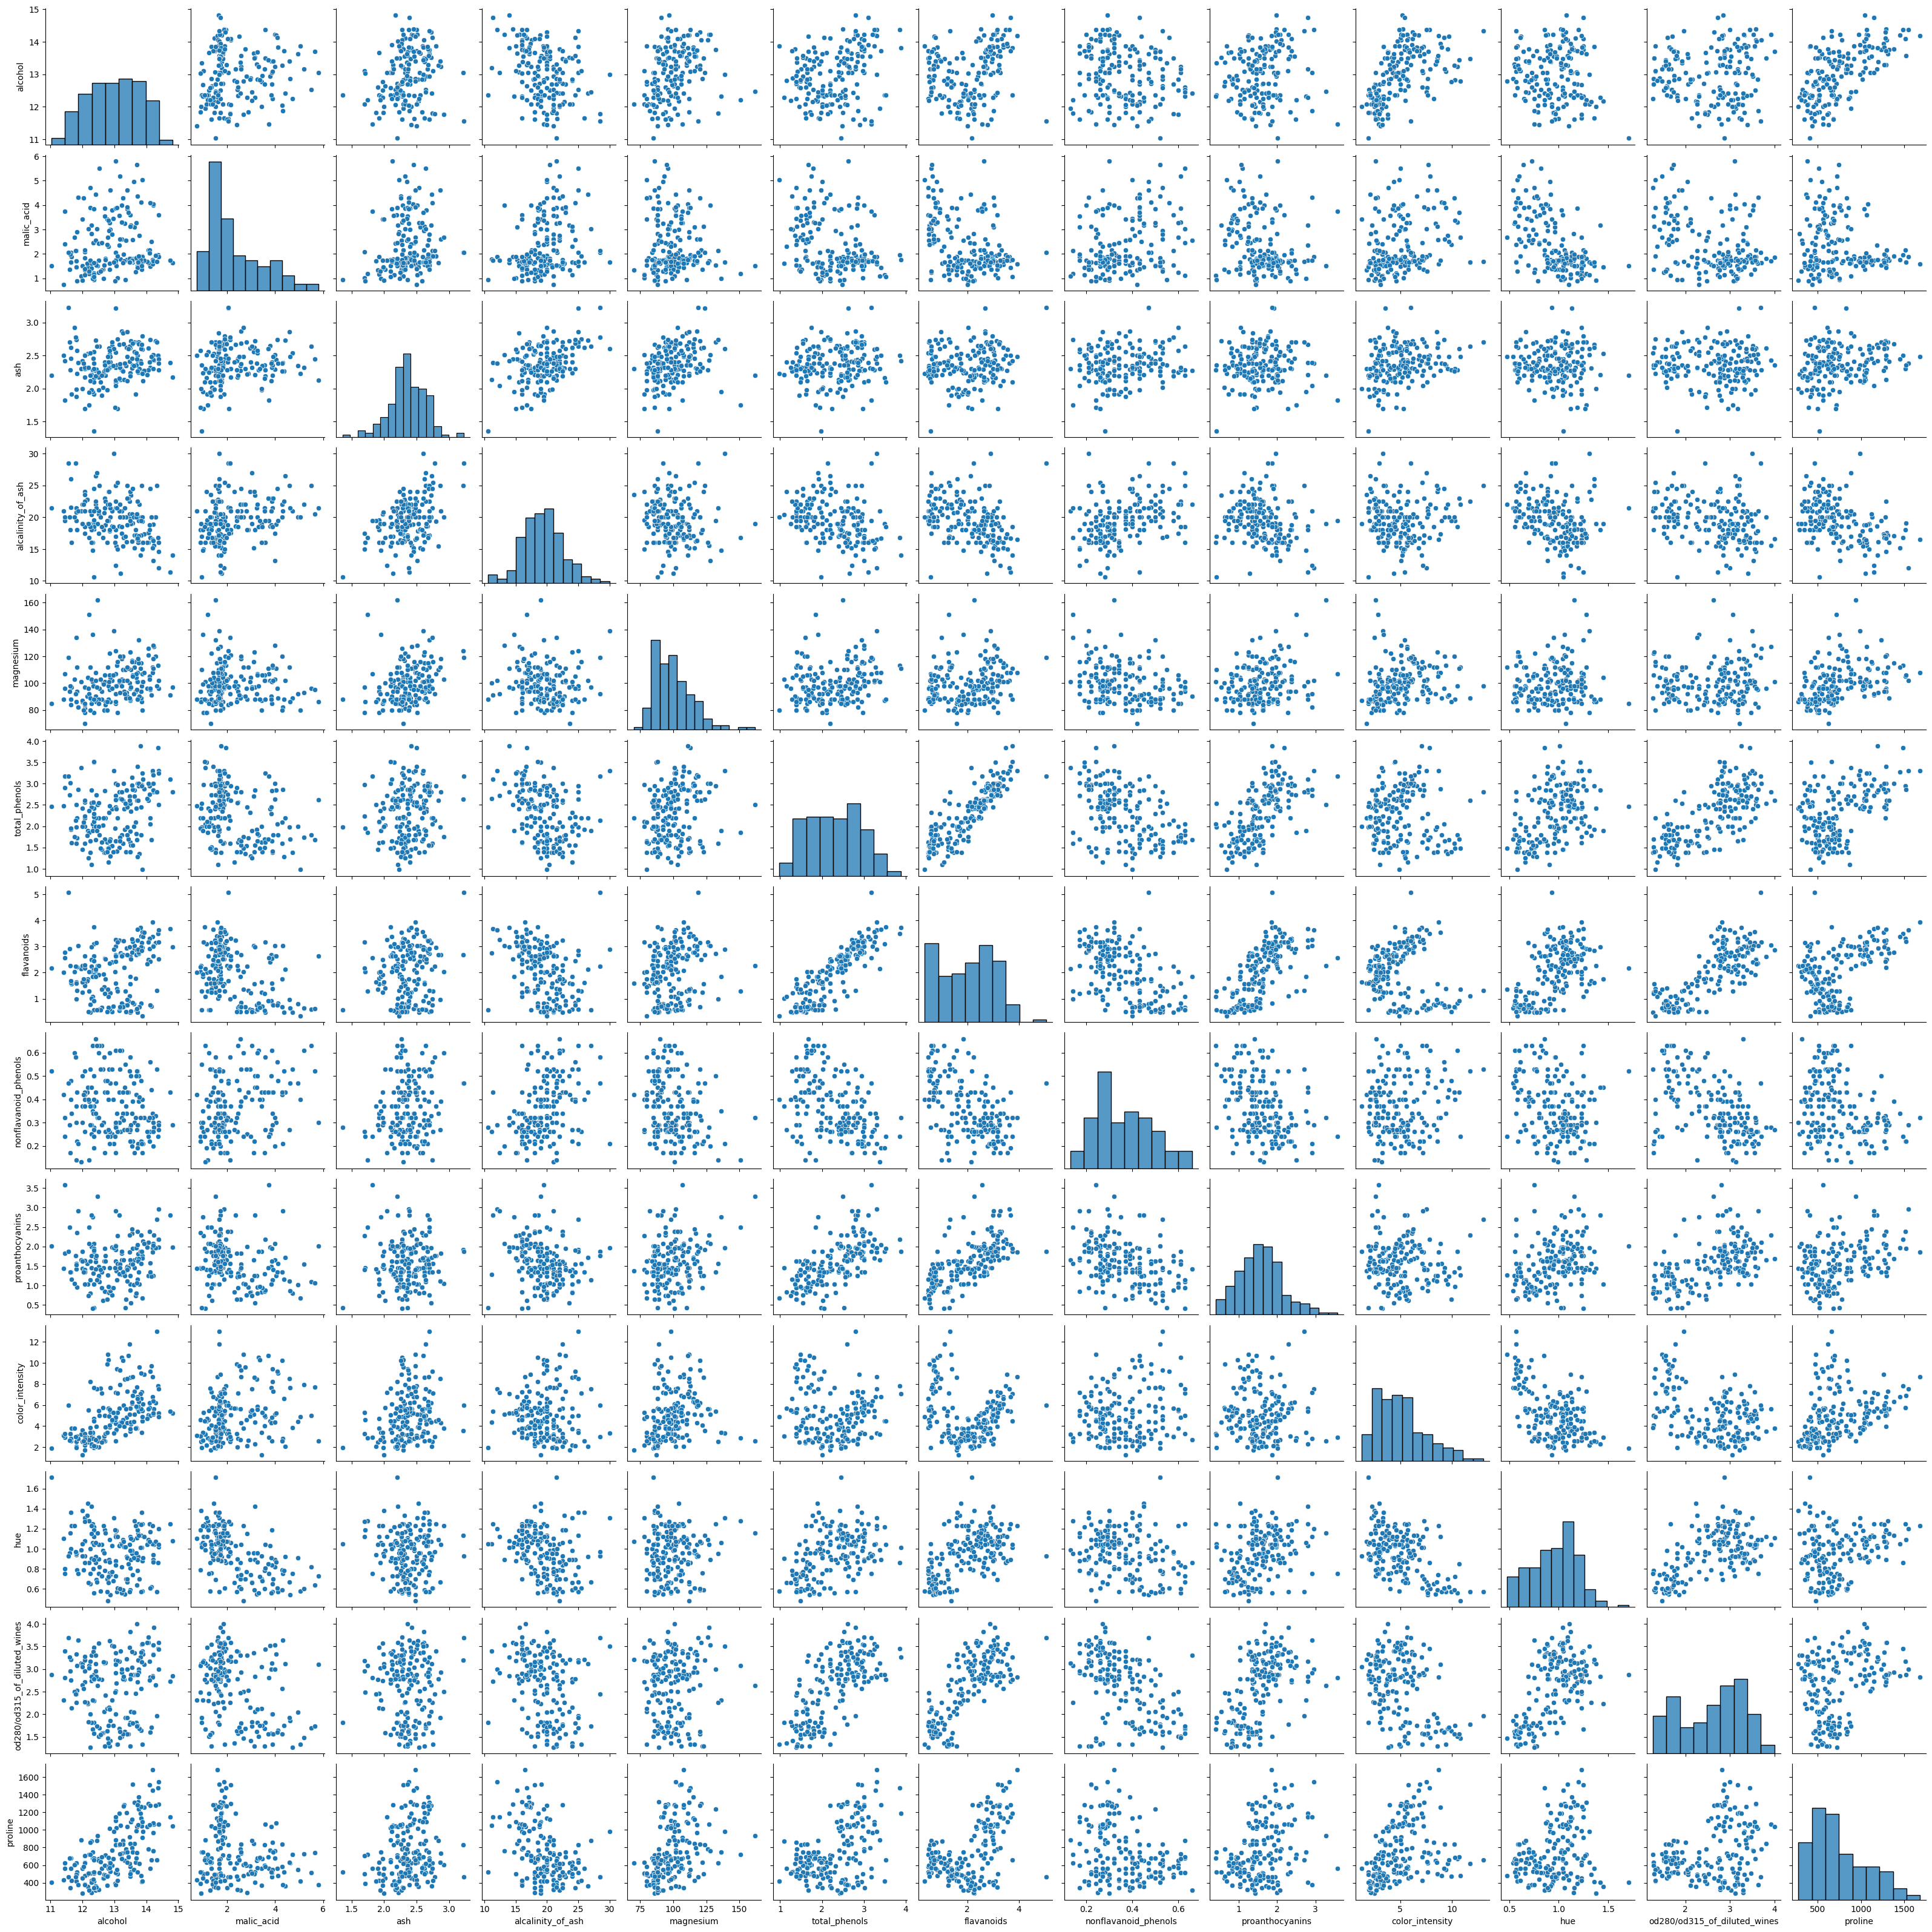

In [4]:
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
sns.pairplot(wine_df)
plt.show()

### Обучение используя все фичи

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [6]:
model = Perceptron()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Аккуратность получилась маленькая, всего 0.518

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Acc :", accuracy)

Acc : 0.5185185185185185


### Выделим наиболее значимые фичи

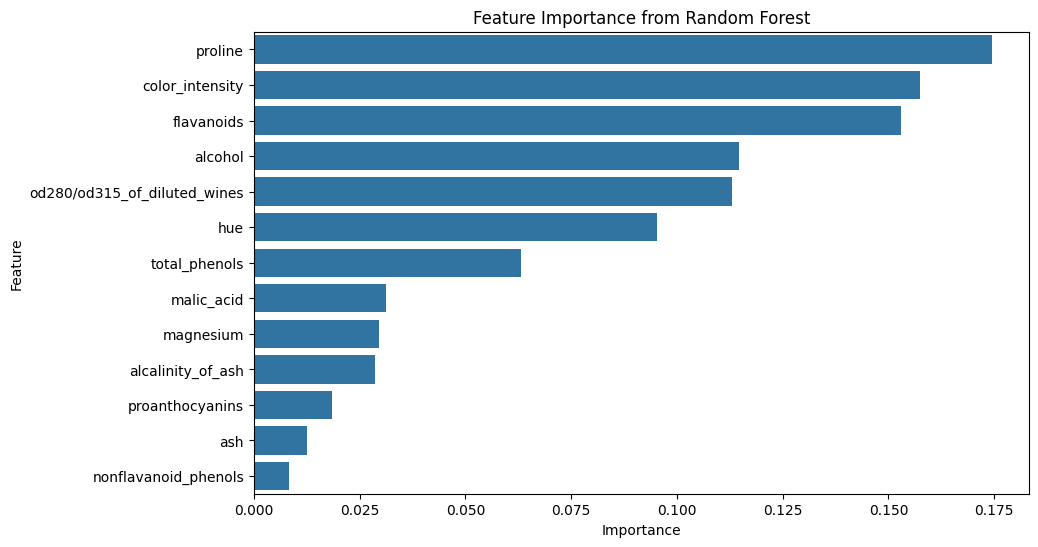

In [8]:
# Создаем экземпляр класса случайного леса
random_forest = RandomForestClassifier()

# Обучаем модель на данных
random_forest.fit(wine_data.data, wine_data.target)

# Получаем важность признаков
feature_importance = random_forest.feature_importances_

# Создаем датафрейм для удобства отображения
importance_df = pd.DataFrame({'Feature': wine_data.feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Отобразим важность признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importance from Random Forest')
plt.show()

/tmp/ipykernel_10263/3825763960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['target'] = wine_data.target


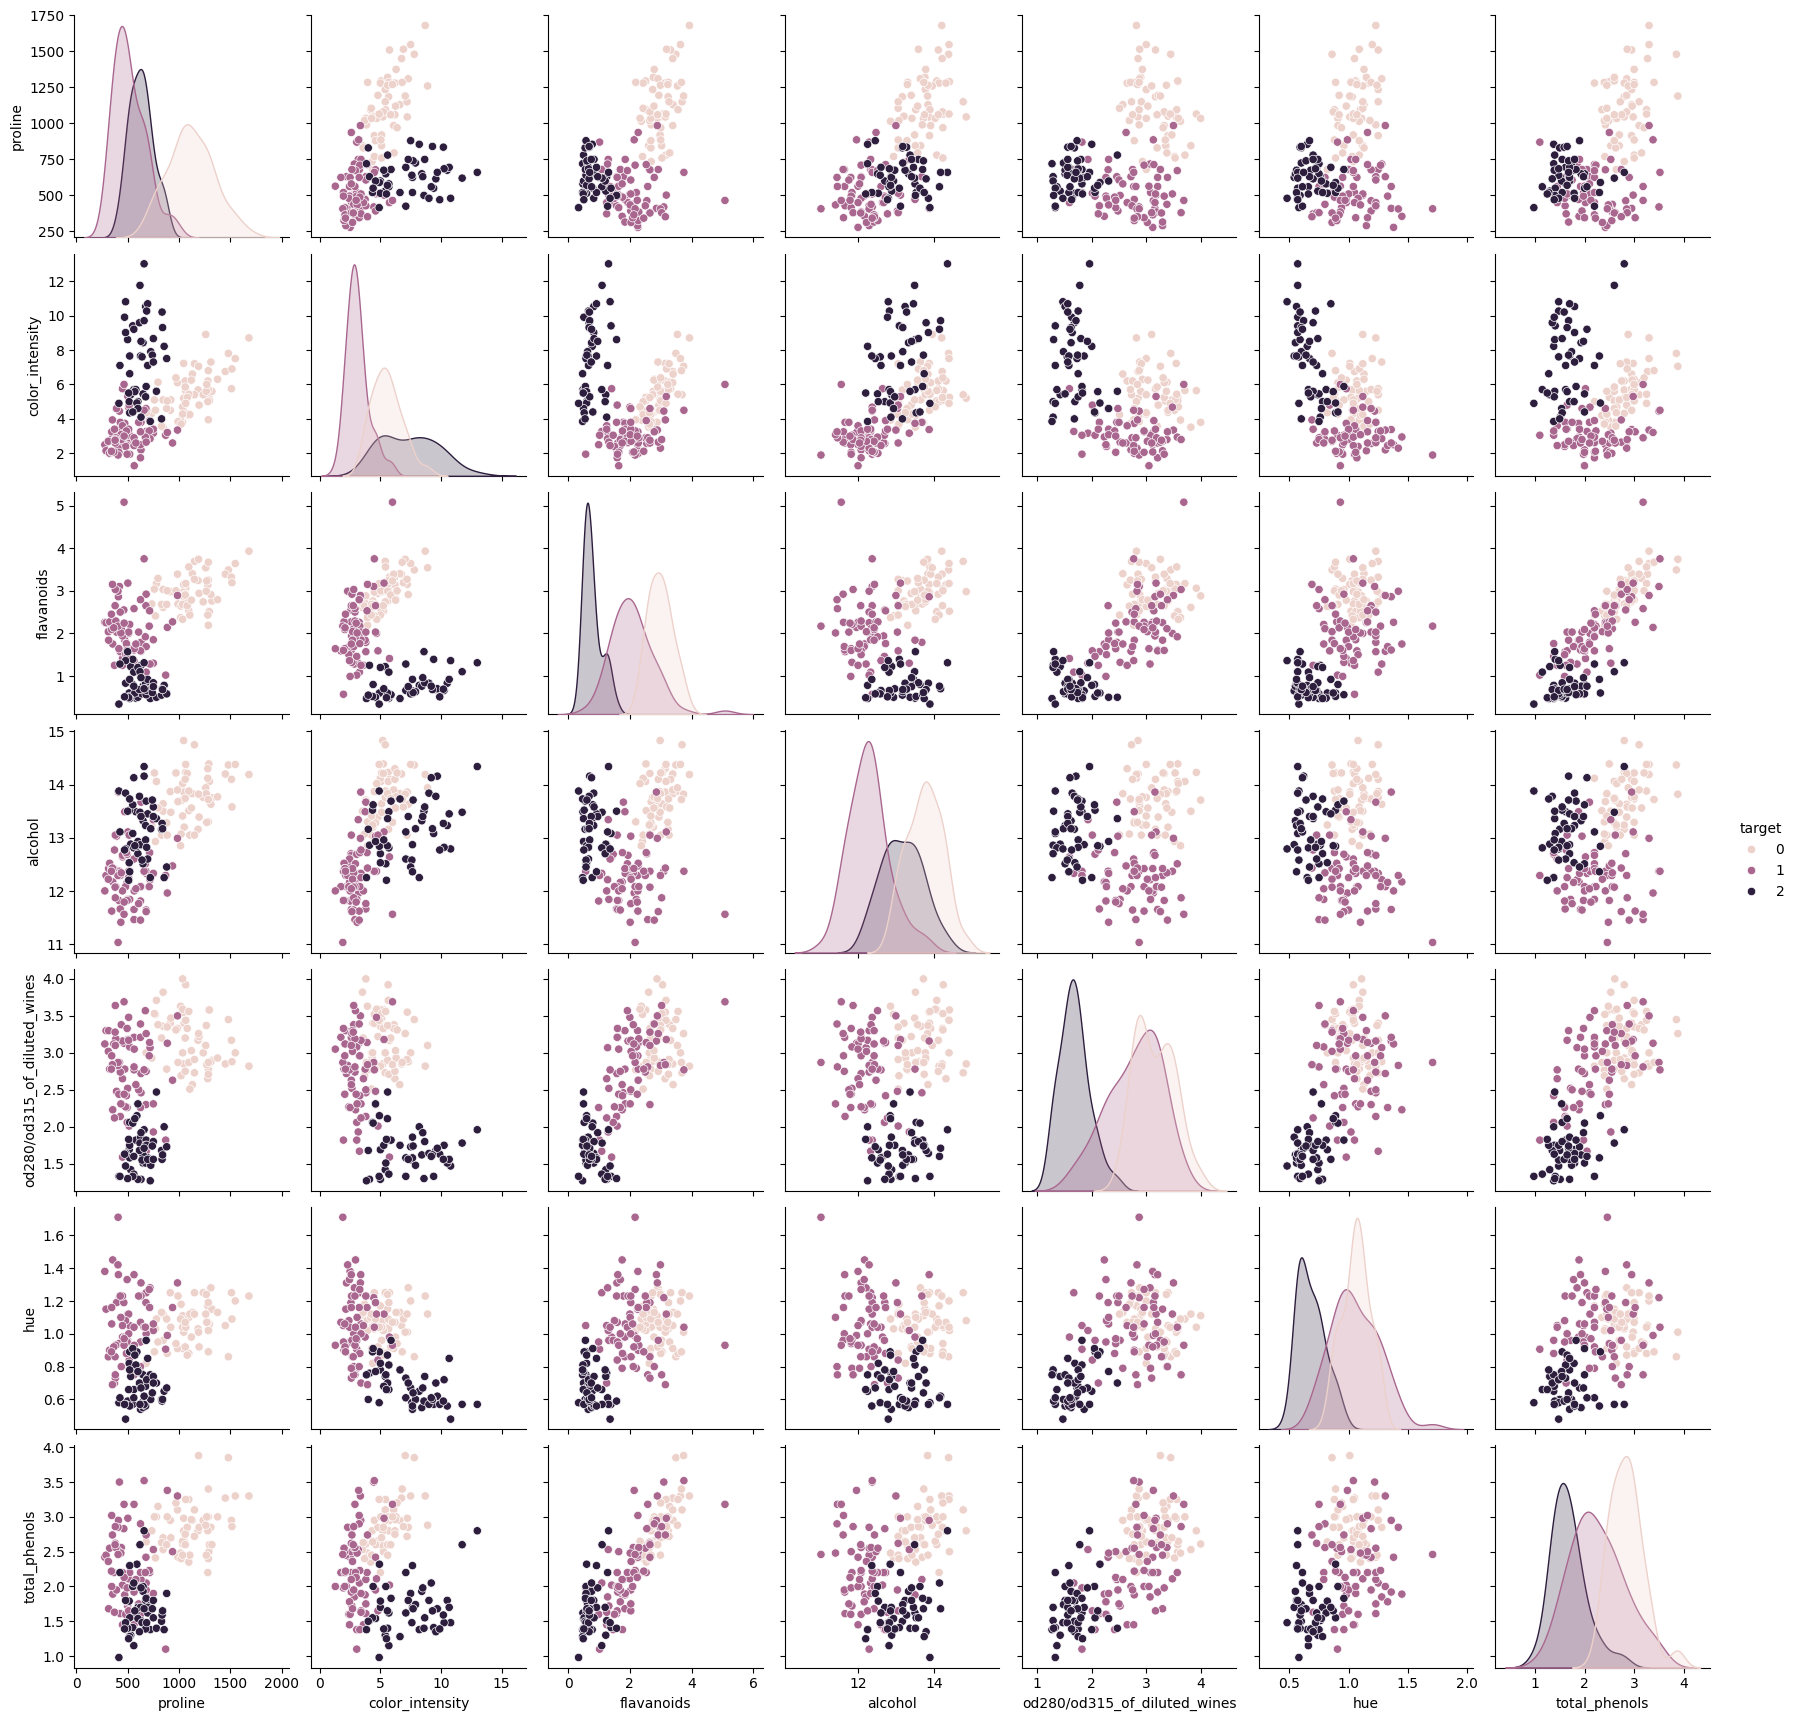

In [9]:
selected_features = importance_df.iloc[:7]['Feature'].values
selected_data = wine_df[selected_features]

selected_data['target'] = wine_data.target
sns.pairplot(selected_data, hue='target')
plt.show()

### Обучим модель на основе 7 главных фичей

In [10]:
X = selected_data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = Perceptron()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acc :", accuracy)

std_deviation = selected_data.std()
print("STD Deviation: \n", std_deviation)

Acc : 0.3888888888888889
STD Deviation: 
 proline                         314.907474
color_intensity                   2.318286
flavanoids                        0.998859
alcohol                           0.811827
od280/od315_of_diluted_wines      0.709990
hue                               0.228572
total_phenols                     0.625851
target                            0.775035
dtype: float64


### Среднеквадратичное отклонение фичи proline очень высокое, дропнем ее из датасета

In [11]:
selected_data = selected_data.drop('proline', axis=1)

X = selected_data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = Perceptron()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acc :", accuracy)

Acc : 0.9629629629629629


### Мы получили наиболее высокую аккуратность: 0.96
#### выбранные фичи:
- flavanoids
- color_intensity
- alcohol
- od280
- hue
- total_phenols

In [ ]:
Alcohol = float(input("Alcohol"))

Malic_acid = float(input("Malic acid"))

Ash = float(input("Ash"))

Alcalinity_of_ash = float(input("Alcalinity of ash"))

Magnesium = float(input("Magnesium"))

Total_phenols = float(input("Total phenols"))

Flavanoids = float(input("Flavanoids"))

Nonflavanoid_phenols = float(input("Nonflavanoid_phenols"))

Proanthocyanins = float(input("Proanthocyanins"))

Color_intensity = float(input("Color intensity"))

Hue = float(input("Hue"))

OD280 = float(input("OD280/OD315 of diluted wines"))

Proline = float(input("Proline"))

values = [
    [
        Alcohol,
        Malic_acid,
        Ash,
        Alcalinity_of_ash,
        Magnesium,
        Total_phenols,
        Flavanoids,
        Nonflavanoid_phenols,
        Proanthocyanins,
        Color_intensity,
        Hue,
        OD280,
        Proline,
    ]
]

Y_pred = model.predict(values)
print("Class: ", Y_pred)
